# Banxi Site Analysis

In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import numpy as np

## Functions

In [2]:
def list_components(df):
    components = []
    for i in range(len(df.index)):
        if df['dir_comp_name'][i] not in components:
            components.append(df['dir_comp_name'][i])
    print(components)

In [3]:
def specimen_plot(site, comp, savestring=None):
    site_specimens = specimens[specimens['site']==site].copy()

    site_tc = site_specimens[site_specimens['dir_tilt_correction']==100]
    site_is = site_specimens[site_specimens['dir_tilt_correction']==0]
    
    if comp == 'LT':
        site_tc_comp = site_tc[(site_tc['dir_comp']=='LT')|(site_tc['dir_comp']=='MT')]
        site_is_comp = site_is[(site_is['dir_comp']=='LT')|(site_is['dir_comp']=='MT')]
    elif comp =='HT':
        site_tc_comp = site_tc[site_tc['dir_comp']=='HT']
        site_is_comp = site_is[site_is['dir_comp']=='HT']
    else:
        print('pick LT or HT')
        
    site_tc_comp_dec_vec = site_tc_comp[site_tc_comp['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
    site_tc_comp_inc_vec = site_tc_comp[site_tc_comp['dir_bfv_dec'].isnull()]['dir_inc'].tolist()
    
    site_is_comp_dec_vec = site_is_comp[site_is_comp['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
    site_is_comp_inc_vec = site_is_comp[site_is_comp['dir_bfv_dec'].isnull()]['dir_inc'].tolist()
    
    site_tc_comp_dec_bfv = site_tc_comp[~site_tc_comp['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
    site_tc_comp_inc_bfv = site_tc_comp[~site_tc_comp['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()
    
    site_is_comp_dec_bfv = site_is_comp[~site_is_comp['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
    site_is_comp_inc_bfv = site_is_comp[~site_is_comp['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()
    
    site_tc_comp_dec = site_tc_comp_dec_vec + site_tc_comp_dec_bfv
    site_tc_comp_inc = site_tc_comp_inc_vec + site_tc_comp_inc_bfv
    
    site_is_comp_dec = site_is_comp_dec_vec + site_is_comp_dec_bfv
    site_is_comp_inc = site_is_comp_inc_vec + site_is_comp_inc_bfv
    
    site_tc_comp_mean = ipmag.fisher_mean(site_tc_comp_dec, site_tc_comp_inc)
    site_is_comp_mean = ipmag.fisher_mean(site_is_comp_dec, site_is_comp_inc)
    
    print('n vectors = {}'.format(len(site_tc_comp_dec_vec)))
    print('n planes  = {}'.format(len(site_tc_comp_dec_bfv)))
    
    if len(site_tc_comp_dec)>1:
        print('tilt-corrected alpha95 = {:.2f}'.format(site_tc_comp_mean['alpha95']))
        print('geographic     alpha95 = {:.2f}'.format(site_is_comp_mean['alpha95']))
    
    fignum = 1
    plt.figure(num=fignum,figsize=(5,5))
    ipmag.plot_net(fignum)
    
    ipmag.plot_di(site_tc_comp_dec_vec, site_tc_comp_inc_vec,
                  color='C0', marker='o', label='tilt-corrected vector')
    ipmag.plot_di(site_tc_comp_dec_bfv, site_tc_comp_inc_bfv,
                  color='C0', marker='^', label='tilt-corrected plane')
    ipmag.plot_di(site_is_comp_dec_vec, site_is_comp_inc_vec,
                  color='C1', marker='o', label='geographic vector')
    ipmag.plot_di(site_is_comp_dec_bfv, site_is_comp_inc_bfv,
                  color='C1', marker='^', label='geographic plane')
    
    if len(site_tc_comp_dec)>1:
        ipmag.plot_di_mean(site_tc_comp_mean['dec'], site_tc_comp_mean['inc'], site_tc_comp_mean['alpha95'],
                           color='k', marker='s')
        ipmag.plot_di_mean(site_is_comp_mean['dec'], site_is_comp_mean['inc'], site_is_comp_mean['alpha95'],
                           color='k', marker='s')
    
    plt.title(comp)
    plt.legend(loc='middle left', bbox_to_anchor=(1.02,0.5))
    
    if savestring!=None:
        plt.savefig('Output/'+savestring, bbox_inches='tight')
    
    plt.show()

In [4]:
def BJ_specimen_plot(site, comp, bed_strike, bed_dip, savestring=None):
    site_specimens = specimensBJ[specimensBJ['site']==site].copy()
    site_samples = samplesBJ[samplesBJ['site']==site].copy()

    site_is = site_specimens[site_specimens['dir_tilt_correction']==0]
    
    old_bed_dip_dir = site_samples['bed_dip_direction'].tolist()
    old_bed_dip = site_samples['bed_dip'].tolist()
    
    if comp == 'LT':
        site_is_comp = site_is[(site_is['dir_comp']=='LT')|(site_is['dir_comp']=='MT')]
    elif comp =='HT':
        site_is_comp = site_is[site_is['dir_comp']=='HT']
    else:
        print('pick LT or HT')
    
    site_is_comp_dec_vec = site_is_comp[site_is_comp['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
    site_is_comp_inc_vec = site_is_comp[site_is_comp['dir_bfv_dec'].isnull()]['dir_inc'].tolist()
    
    site_is_comp_dec_bfv = site_is_comp[~site_is_comp['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
    site_is_comp_inc_bfv = site_is_comp[~site_is_comp['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()
    
    site_is_comp_dec = site_is_comp_dec_vec + site_is_comp_dec_bfv
    site_is_comp_inc = site_is_comp_inc_vec + site_is_comp_inc_bfv
    
    site_is_comp_mean = ipmag.fisher_mean(site_is_comp_dec, site_is_comp_inc)
    
    site_tc_comp_dec_vec = []
    site_tc_comp_inc_vec = []
    for i in range(len(site_is_comp_dec_vec)):
        dec_vec, inc_vec = pmag.dotilt(site_is_comp_dec_vec[i], site_is_comp_inc_vec[i],
                                       (bed_strike+90)%360, bed_dip)
        site_tc_comp_dec_vec.append(dec_vec)
        site_tc_comp_inc_vec.append(inc_vec)
        
    site_tc_comp_dec_bfv = []
    site_tc_comp_inc_bfv = []
    for i in range(len(site_is_comp_dec_bfv)):
        dec_bfv, inc_bfv = pmag.dotilt(site_is_comp_dec_bfv[i], site_is_comp_inc_bfv[i],
                                       (bed_strike+90)%360, bed_dip)
        site_tc_comp_dec_bfv.append(dec_bfv)
        site_tc_comp_inc_bfv.append(inc_bfv)
    
    site_tc_comp_dec = site_tc_comp_dec_vec + site_tc_comp_dec_bfv
    site_tc_comp_inc = site_tc_comp_inc_vec + site_tc_comp_inc_bfv
    
    site_tc_comp_mean = ipmag.fisher_mean(site_tc_comp_dec, site_tc_comp_inc)
    
    print('old bed dip direction = ' + str(old_bed_dip_dir))
    print('old bed dip           = ' + str(old_bed_dip))
    print('')
    print('new bed dip direction = {:.2f}'.format((bed_strike+90)%360))
    print('new bed dip           = {:.2f}'.format(bed_dip))
    print('')
    
    print('n vectors = {}'.format(len(site_tc_comp_dec_vec)))
    print('n planes  = {}'.format(len(site_tc_comp_dec_bfv)))
    
    if len(site_tc_comp_dec)>1:
        print('tilt-corrected alpha95 = {:.2f}'.format(site_tc_comp_mean['alpha95']))
        print('geographic     alpha95 = {:.2f}'.format(site_is_comp_mean['alpha95']))
    
    fignum = 1
    plt.figure(num=fignum,figsize=(5,5))
    ipmag.plot_net(fignum)
    
    ipmag.plot_di(site_tc_comp_dec_vec, site_tc_comp_inc_vec,
                  color='C0', marker='o', label='tilt-corrected vector')
    ipmag.plot_di(site_tc_comp_dec_bfv, site_tc_comp_inc_bfv,
                  color='C0', marker='^', label='tilt-corrected plane')
    ipmag.plot_di(site_is_comp_dec_vec, site_is_comp_inc_vec,
                  color='C1', marker='o', label='geographic vector')
    ipmag.plot_di(site_is_comp_dec_bfv, site_is_comp_inc_bfv,
                  color='C1', marker='^', label='geographic plane')
    
    if len(site_tc_comp_dec)>1:
        ipmag.plot_di_mean(site_tc_comp_mean['dec'], site_tc_comp_mean['inc'], site_tc_comp_mean['alpha95'],
                           color='k', marker='s')
        ipmag.plot_di_mean(site_is_comp_mean['dec'], site_is_comp_mean['inc'], site_is_comp_mean['alpha95'],
                           color='k', marker='s')
    
    plt.title(comp)
    plt.legend(loc='middle left', bbox_to_anchor=(1.02,0.5))
    
    if savestring!=None:
        plt.savefig('Output/'+savestring, bbox_inches='tight')
    
    plt.show()

In [5]:
def get_BJ_site_mean(site, comp, bed_strike, bed_dip):
    site_specimens = specimensBJ[specimensBJ['site']==site].copy()
    site_samples = samplesBJ[samplesBJ['site']==site].copy()

    site_is = site_specimens[site_specimens['dir_tilt_correction']==0]
    
    old_bed_dip_dir = site_samples['bed_dip_direction'].tolist()
    old_bed_dip = site_samples['bed_dip'].tolist()
    
    if comp == 'LT':
        site_is_comp = site_is[(site_is['dir_comp']=='LT')|(site_is['dir_comp']=='MT')]
    elif comp =='HT':
        site_is_comp = site_is[site_is['dir_comp']=='HT']
    else:
        print('pick LT or HT')
    
    site_is_comp_dec_vec = site_is_comp[site_is_comp['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
    site_is_comp_inc_vec = site_is_comp[site_is_comp['dir_bfv_dec'].isnull()]['dir_inc'].tolist()
    
    site_is_comp_dec_bfv = site_is_comp[~site_is_comp['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
    site_is_comp_inc_bfv = site_is_comp[~site_is_comp['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()
    
    site_is_comp_dec = site_is_comp_dec_vec + site_is_comp_dec_bfv
    site_is_comp_inc = site_is_comp_inc_vec + site_is_comp_inc_bfv
    
    site_is_comp_mean = ipmag.fisher_mean(site_is_comp_dec, site_is_comp_inc)
    
    site_tc_comp_dec_vec = []
    site_tc_comp_inc_vec = []
    for i in range(len(site_is_comp_dec_vec)):
        dec_vec, inc_vec = pmag.dotilt(site_is_comp_dec_vec[i], site_is_comp_inc_vec[i],
                                       (bed_strike+90)%360, bed_dip)
        site_tc_comp_dec_vec.append(dec_vec)
        site_tc_comp_inc_vec.append(inc_vec)
        
    site_tc_comp_dec_bfv = []
    site_tc_comp_inc_bfv = []
    for i in range(len(site_is_comp_dec_bfv)):
        dec_bfv, inc_bfv = pmag.dotilt(site_is_comp_dec_bfv[i], site_is_comp_inc_bfv[i],
                                       (bed_strike+90)%360, bed_dip)
        site_tc_comp_dec_bfv.append(dec_bfv)
        site_tc_comp_inc_bfv.append(inc_bfv)
    
    site_tc_comp_dec = site_tc_comp_dec_vec + site_tc_comp_dec_bfv
    site_tc_comp_inc = site_tc_comp_inc_vec + site_tc_comp_inc_bfv
    
    site_tc_comp_mean = ipmag.fisher_mean(site_tc_comp_dec, site_tc_comp_inc)
    
    return(site_is_comp_mean, site_tc_comp_mean)

## Data

### Berkeley

Read in data:

In [6]:
sites1 = pd.read_csv('PM_data1/sites.txt',sep='\t',header=1)
sites2 = pd.read_csv('PM_data2/sites.txt',sep='\t',header=1)
sites3 = pd.read_csv('PM_data3/sites.txt',sep='\t',header=1)

In [7]:
specimens1 = pd.read_csv('PM_data1/specimens.txt',sep='\t',header=1)
specimens2 = pd.read_csv('PM_data2/specimens.txt',sep='\t',header=1)
specimens3 = pd.read_csv('PM_data3/specimens.txt',sep='\t',header=1)

In [8]:
samples1 = pd.read_csv('PM_data1/samples.txt',sep='\t',header=1)
samples2 = pd.read_csv('PM_data2/samples.txt',sep='\t',header=1)
samples3 = pd.read_csv('PM_data3/samples.txt',sep='\t',header=1)

In [9]:
list_components(sites1)

['HT', 'MT', 'LT']


In [10]:
list_components(sites2)

['HT', 'LT']


In [11]:
list_components(sites3)

['HT', 'LT']


Merge data into a single dataframe:

In [12]:
sites = pd.concat([sites1, sites2, sites3], ignore_index=True)
sites.columns

Index(['site', 'location', 'samples', 'specimens', 'age', 'age_high',
       'age_low', 'age_sigma', 'age_unit', 'dir_alpha95', 'dir_comp_name',
       'dir_dec', 'dir_inc', 'dir_k', 'dir_n_samples', 'dir_n_specimens_lines',
       'dir_n_specimens_planes', 'dir_polarity', 'dir_r',
       'dir_tilt_correction', 'lat', 'lon', 'analysts', 'criteria',
       'software_packages', 'citations', 'method_codes', 'result_quality',
       'result_type', 'vgp_dm', 'vgp_dp', 'vgp_lat', 'vgp_lon',
       'dir_n_specimens'],
      dtype='object')

In [13]:
specimens = pd.concat([specimens1, specimens2, specimens3], ignore_index=True)
specimens.columns

Index(['specimen', 'experiments', 'sample', 'dir_alpha95', 'dir_bfv_dec',
       'dir_bfv_inc', 'dir_comp', 'dir_dec', 'dir_inc', 'dir_n_comps',
       'dir_n_measurements', 'dir_tilt_correction', 'dir_dang', 'dir_mad_free',
       'meas_step_max', 'meas_step_min', 'meas_step_unit', 'analysts',
       'instrument_codes', 'software_packages', 'int_corr', 'citations',
       'method_codes', 'result_quality', 'volume', 'weight', 'location',
       'site'],
      dtype='object')

In [14]:
samples = pd.concat([samples1, samples2, samples3], ignore_index=True)
samples.columns

Index(['analysts', 'azimuth', 'azimuth_dec_correction', 'bed_dip',
       'bed_dip_direction', 'citations', 'dip', 'geologic_classes',
       'geologic_types', 'height', 'lithologies', 'method_codes', 'sample',
       'site'],
      dtype='object')

### Beijing

In [15]:
sitesBJ = pd.read_csv('Beijing_data/sites.txt',sep='\t',header=1)
specimensBJ = pd.read_csv('Beijing_data/specimens.txt',sep='\t',header=1)
samplesBJ = pd.read_csv('Beijing_data/samples.txt',sep='\t',header=1)

## Sites

In [16]:
site_list = sites['site'].unique()
site_list

array(['TR002', 'TR004', 'TR006', 'TR008', 'TR010', 'TR012', 'TR014',
       'TR018', 'TR020', 'TR022', 'TR024', 'TR026', 'TR035', 'TR036',
       'TR042', 'TR045', 'TR016', 'TR028', 'TR030', 'TR032', 'TR038',
       'TR040'], dtype=object)

### Berkeley

#### TR002

n vectors = 8
n planes  = 0
tilt-corrected alpha95 = 6.45
geographic     alpha95 = 6.45


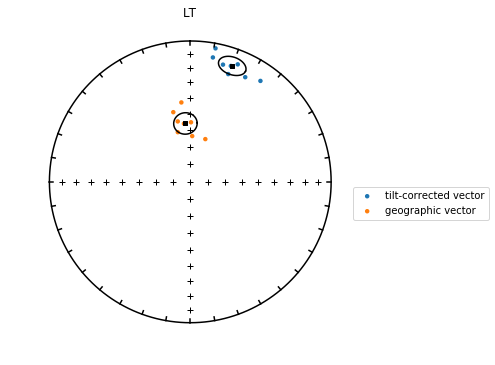

In [17]:
specimen_plot('TR002','LT')

n vectors = 5
n planes  = 3
tilt-corrected alpha95 = 11.92
geographic     alpha95 = 11.91


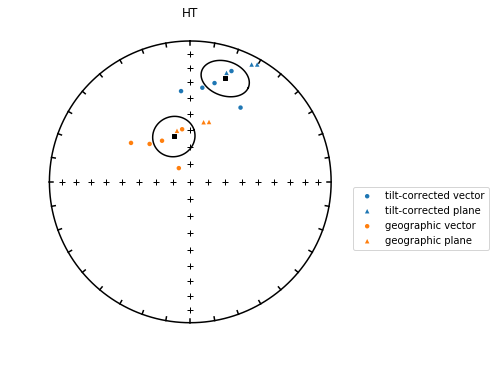

In [18]:
specimen_plot('TR002','HT',savestring='TR002_HT.pdf')

#### TR004

n vectors = 17
n planes  = 0
tilt-corrected alpha95 = 4.51
geographic     alpha95 = 4.51


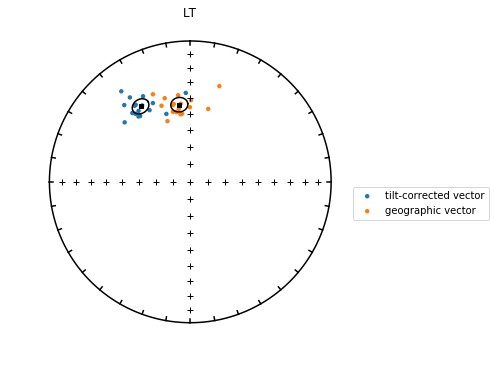

In [19]:
specimen_plot('TR004','LT')

n vectors = 12
n planes  = 3
tilt-corrected alpha95 = 57.24
geographic     alpha95 = 57.23


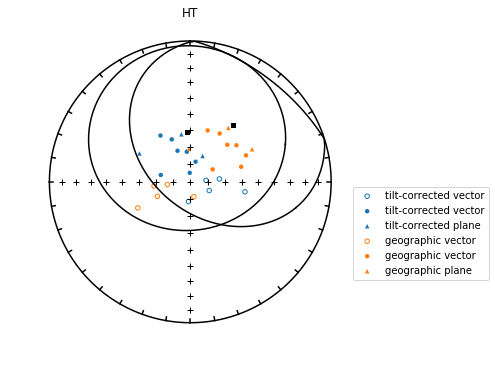

In [20]:
specimen_plot('TR004','HT',savestring='TR004_HT.pdf')

This site has dual polarity - treat them as two different sites:

In [21]:
TR004_specimens = specimens[specimens['site']=='TR004'].copy()

TR004_tc = TR004_specimens[TR004_specimens['dir_tilt_correction']==100]
TR004_is = TR004_specimens[TR004_specimens['dir_tilt_correction']==0]

TR004_tc_HT = TR004_tc[TR004_tc['dir_comp']=='HT']
TR004_is_HT = TR004_is[TR004_is['dir_comp']=='HT']

TR004_tc_HT_dec_vec = TR004_tc_HT[TR004_tc_HT['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
TR004_tc_HT_inc_vec = TR004_tc_HT[TR004_tc_HT['dir_bfv_dec'].isnull()]['dir_inc'].tolist()

TR004_is_HT_dec_vec = TR004_is_HT[TR004_is_HT['dir_bfv_dec'].isnull()]['dir_dec'].tolist()
TR004_is_HT_inc_vec = TR004_is_HT[TR004_is_HT['dir_bfv_dec'].isnull()]['dir_inc'].tolist()

TR004_tc_HT_dec_bfv = TR004_tc_HT[~TR004_tc_HT['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
TR004_tc_HT_inc_bfv = TR004_tc_HT[~TR004_tc_HT['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()

TR004_is_HT_dec_bfv = TR004_is_HT[~TR004_is_HT['dir_bfv_dec'].isnull()]['dir_bfv_dec'].tolist()
TR004_is_HT_inc_bfv = TR004_is_HT[~TR004_is_HT['dir_bfv_dec'].isnull()]['dir_bfv_inc'].tolist()

TR004_tc_HT_dec = TR004_tc_HT_dec_vec + TR004_tc_HT_dec_bfv
TR004_tc_HT_inc = TR004_tc_HT_inc_vec + TR004_tc_HT_inc_bfv

TR004_is_HT_dec = TR004_is_HT_dec_vec + TR004_is_HT_dec_bfv
TR004_is_HT_inc = TR004_is_HT_inc_vec + TR004_is_HT_inc_bfv

TR004a_tc_HT_dec = []
TR004a_tc_HT_inc = []
TR004a_is_HT_dec = []
TR004a_is_HT_inc = []

TR004b_tc_HT_dec = []
TR004b_tc_HT_inc = []
TR004b_is_HT_dec = []
TR004b_is_HT_inc = []

for i in range(len(TR004_tc_HT_dec)):
    if TR004_tc_HT_inc[i] > 0:
        TR004a_tc_HT_dec.append(TR004_tc_HT_dec[i])
        TR004a_tc_HT_inc.append(TR004_tc_HT_inc[i])
        TR004a_is_HT_dec.append(TR004_is_HT_dec[i])
        TR004a_is_HT_inc.append(TR004_is_HT_inc[i])
    else:
        TR004b_tc_HT_dec.append(TR004_tc_HT_dec[i])
        TR004b_tc_HT_inc.append(TR004_tc_HT_inc[i])
        TR004b_is_HT_dec.append(TR004_is_HT_dec[i])
        TR004b_is_HT_inc.append(TR004_is_HT_inc[i])


TR004a_tc_HT_mean = ipmag.fisher_mean(TR004a_tc_HT_dec, TR004a_tc_HT_inc)
TR004a_is_HT_mean = ipmag.fisher_mean(TR004a_is_HT_dec, TR004a_is_HT_inc)

TR004b_tc_HT_mean = ipmag.fisher_mean(TR004b_tc_HT_dec, TR004b_tc_HT_inc)
TR004b_is_HT_mean = ipmag.fisher_mean(TR004b_is_HT_dec, TR004b_is_HT_inc)

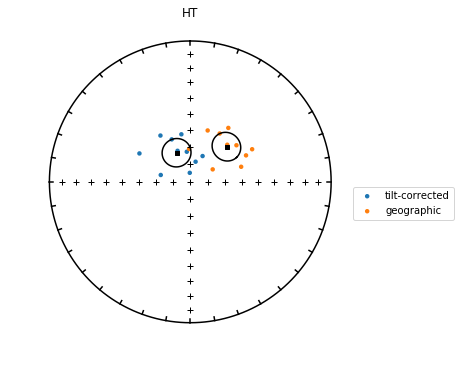

In [22]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)

ipmag.plot_di(TR004a_tc_HT_dec, TR004a_tc_HT_inc,
              color='C0', marker='o', label='tilt-corrected')
ipmag.plot_di(TR004a_is_HT_dec, TR004a_is_HT_inc,
              color='C1', marker='o', label='geographic')

ipmag.plot_di_mean(TR004a_tc_HT_mean['dec'], TR004a_tc_HT_mean['inc'], TR004a_tc_HT_mean['alpha95'],
                   color='k', marker='s')
ipmag.plot_di_mean(TR004a_is_HT_mean['dec'], TR004a_is_HT_mean['inc'], TR004a_is_HT_mean['alpha95'],
                   color='k', marker='s')

plt.title('HT')
plt.legend(loc='middle left', bbox_to_anchor=(1.02,0.5))
plt.show()

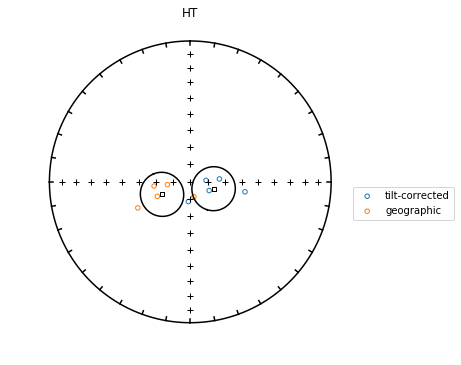

In [23]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)

ipmag.plot_di(TR004b_tc_HT_dec, TR004b_tc_HT_inc,
              color='C0', marker='o', label='tilt-corrected')
ipmag.plot_di(TR004b_is_HT_dec, TR004b_is_HT_inc,
              color='C1', marker='o', label='geographic')

ipmag.plot_di_mean(TR004b_tc_HT_mean['dec'], TR004b_tc_HT_mean['inc'], TR004b_tc_HT_mean['alpha95'],
                   color='k', marker='s')
ipmag.plot_di_mean(TR004b_is_HT_mean['dec'], TR004b_is_HT_mean['inc'], TR004b_is_HT_mean['alpha95'],
                   color='k', marker='s')

plt.title('HT')
plt.legend(loc='middle left', bbox_to_anchor=(1.02,0.5))
plt.show()

#### TR006

n vectors = 15
n planes  = 0
tilt-corrected alpha95 = 4.95
geographic     alpha95 = 4.96


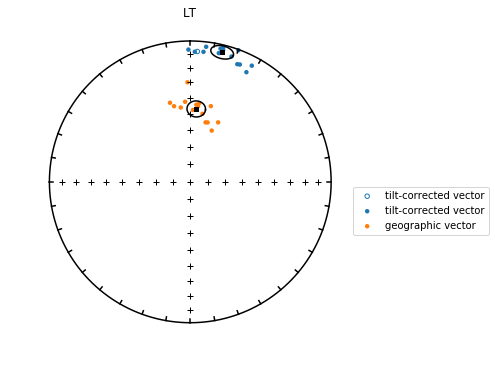

In [24]:
specimen_plot('TR006','LT')

n vectors = 19
n planes  = 2
tilt-corrected alpha95 = 24.06
geographic     alpha95 = 24.06


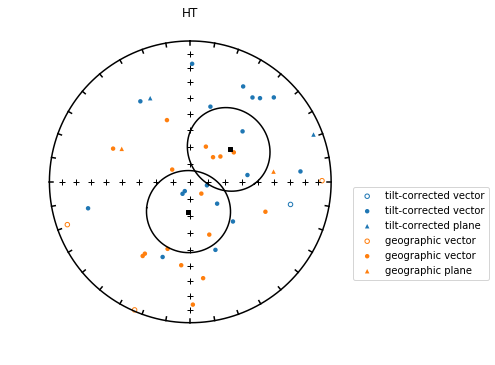

In [25]:
specimen_plot('TR006','HT',savestring='TR006_HT.pdf')

#### TR008

n vectors = 13
n planes  = 0
tilt-corrected alpha95 = 5.67
geographic     alpha95 = 5.67


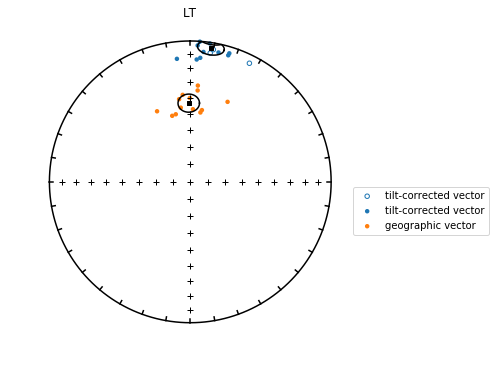

In [26]:
specimen_plot('TR008','LT')

n vectors = 6
n planes  = 0
tilt-corrected alpha95 = 78.47
geographic     alpha95 = 78.52


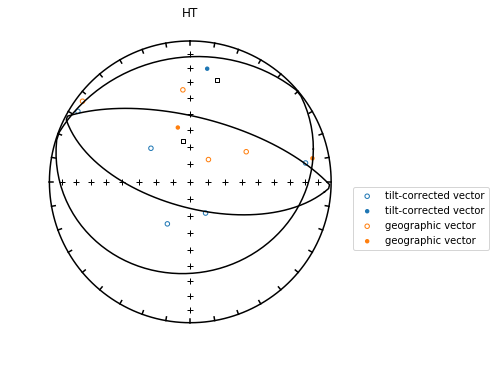

In [27]:
specimen_plot('TR008','HT',savestring='TR008_HT.pdf')

#### TR010

n vectors = 8
n planes  = 0
tilt-corrected alpha95 = 7.79
geographic     alpha95 = 7.80


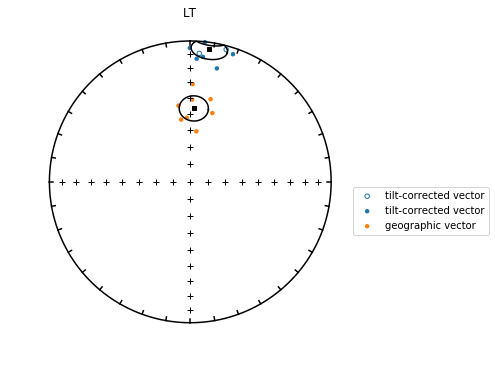

In [28]:
specimen_plot('TR010','LT')

n vectors = 12
n planes  = 0
tilt-corrected alpha95 = 32.79
geographic     alpha95 = 32.80


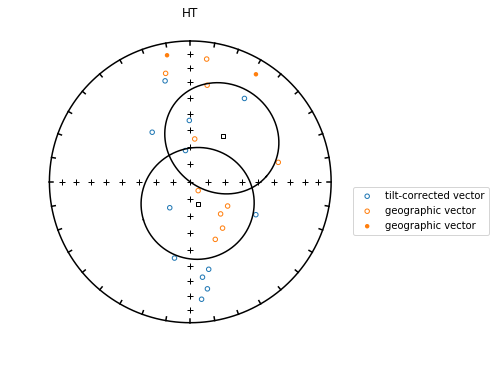

In [29]:
specimen_plot('TR010','HT',savestring='TR010_HT.pdf')

#### TR012

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 17.99
geographic     alpha95 = 17.99


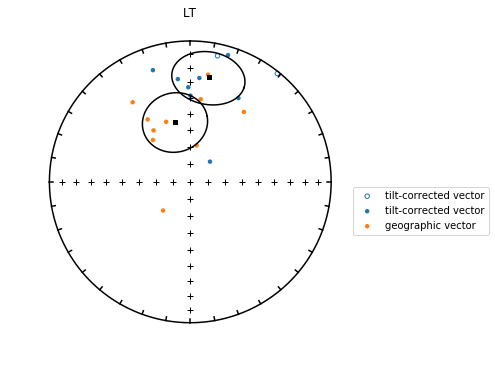

In [30]:
specimen_plot('TR012','LT')

n vectors = 15
n planes  = 0
tilt-corrected alpha95 = 38.28
geographic     alpha95 = 38.28


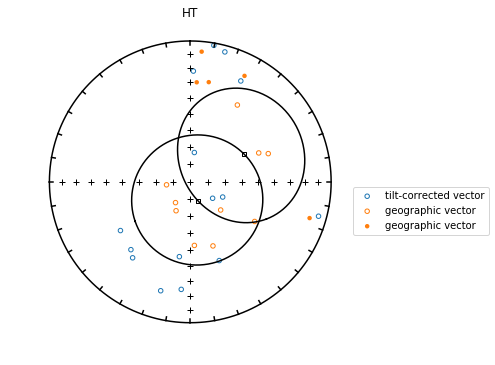

In [31]:
specimen_plot('TR012','HT',savestring='TR012_HT.pdf')

#### TR014

n vectors = 12
n planes  = 0
tilt-corrected alpha95 = 4.62
geographic     alpha95 = 4.63


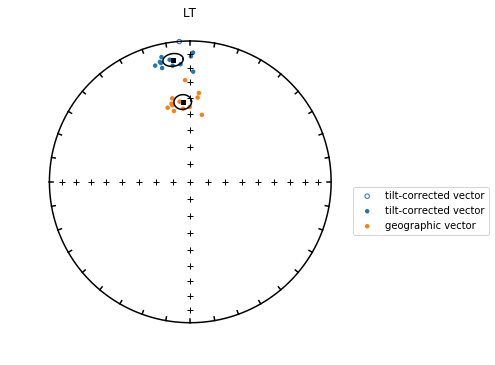

In [32]:
specimen_plot('TR014','LT')

n vectors = 12
n planes  = 0
tilt-corrected alpha95 = 12.09
geographic     alpha95 = 12.10


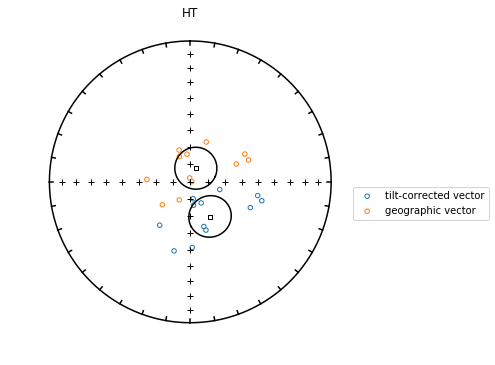

In [33]:
specimen_plot('TR014','HT',savestring='TR014_HT.pdf')

#### TR018

n vectors = 16
n planes  = 0
tilt-corrected alpha95 = 3.35
geographic     alpha95 = 3.36


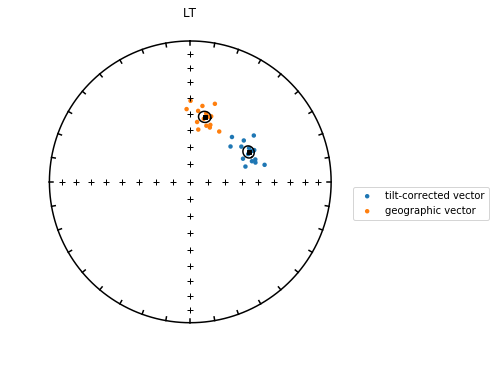

In [34]:
specimen_plot('TR018','LT')

n vectors = 8
n planes  = 6
tilt-corrected alpha95 = 12.21
geographic     alpha95 = 12.20


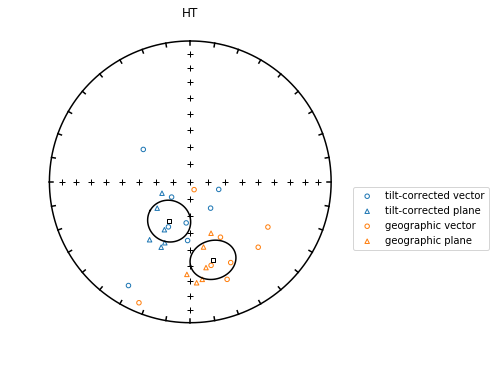

In [35]:
specimen_plot('TR018','HT',savestring='TR018_HT.pdf')

#### TR020

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 6.08
geographic     alpha95 = 6.07


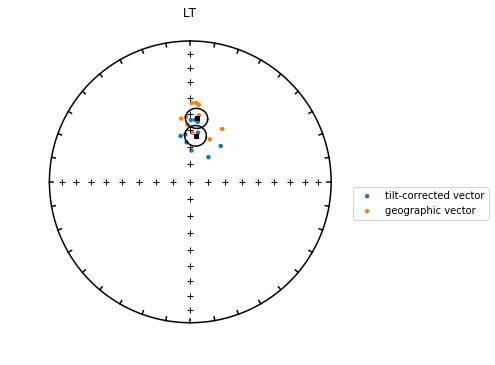

In [36]:
specimen_plot('TR020','LT')

n vectors = 9
n planes  = 1
tilt-corrected alpha95 = 10.87
geographic     alpha95 = 10.87


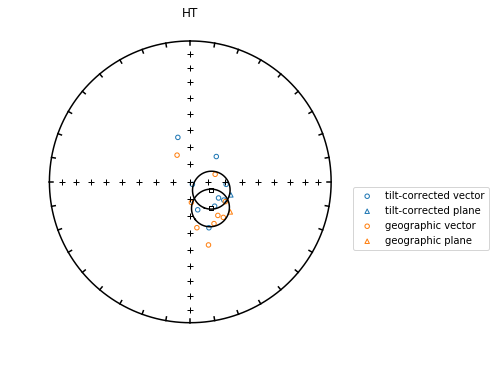

In [37]:
specimen_plot('TR020','HT',savestring='TR020_HT.pdf')

#### TR022

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 4.57
geographic     alpha95 = 4.56


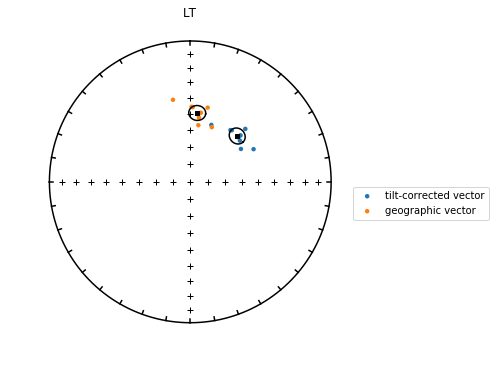

In [38]:
specimen_plot('TR022','LT')

n vectors = 6
n planes  = 1
tilt-corrected alpha95 = 42.45
geographic     alpha95 = 42.45


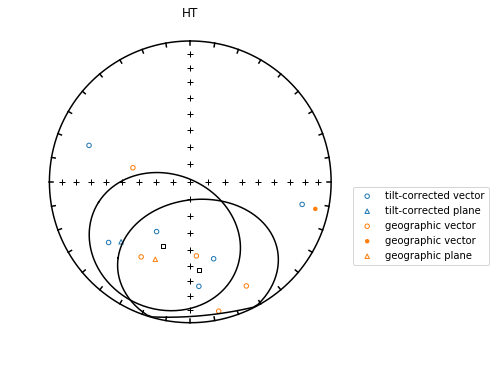

In [39]:
specimen_plot('TR022','HT',savestring='TR022_HT.pdf')

#### TR024

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 7.00
geographic     alpha95 = 7.01


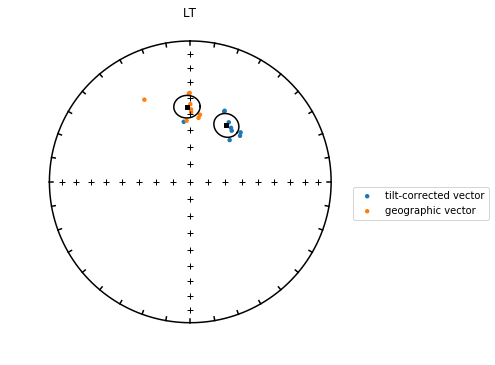

In [40]:
specimen_plot('TR024','LT')

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 18.22
geographic     alpha95 = 18.22


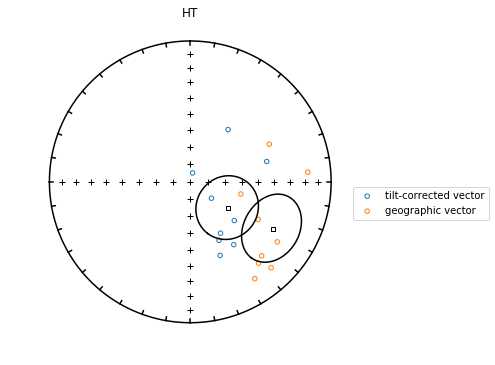

In [41]:
specimen_plot('TR024','HT',savestring='TR024_HT.pdf')

#### TR026

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 7.36
geographic     alpha95 = 7.37


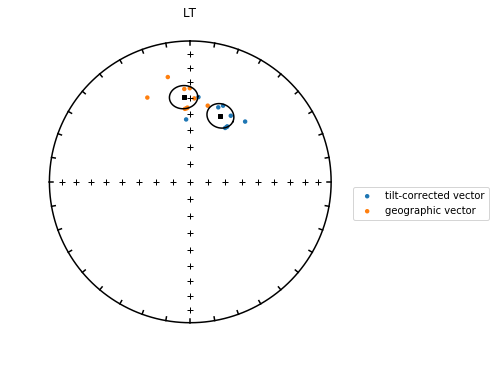

In [42]:
specimen_plot('TR026','LT')

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 15.97
geographic     alpha95 = 15.95


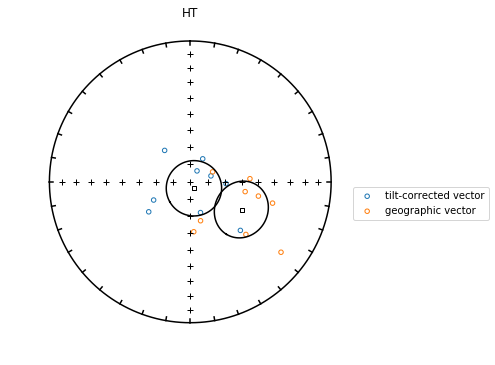

In [43]:
specimen_plot('TR026','HT',savestring='TR026_HT.pdf')

#### TR035

n vectors = 27
n planes  = 0
tilt-corrected alpha95 = 3.97
geographic     alpha95 = 3.88


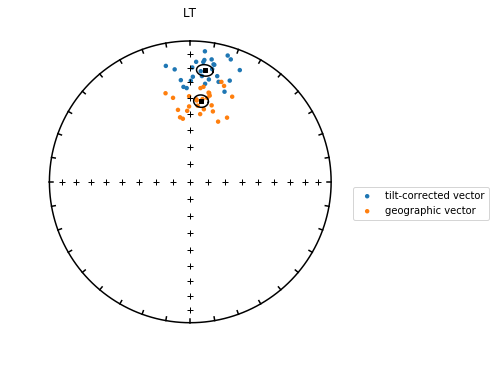

In [44]:
specimen_plot('TR035','LT')

n vectors = 17
n planes  = 2
tilt-corrected alpha95 = 14.42
geographic     alpha95 = 14.65


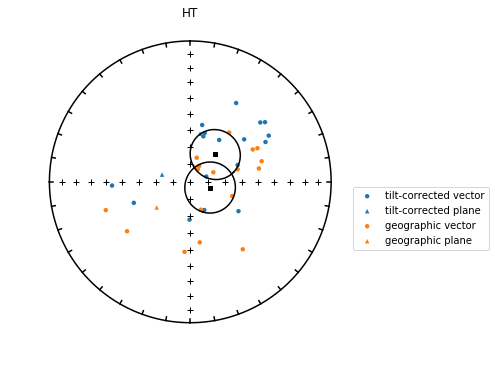

In [45]:
specimen_plot('TR035','HT',savestring='TR035_HT.pdf')

#### TR036

n vectors = 10
n planes  = 0
tilt-corrected alpha95 = 9.19
geographic     alpha95 = 9.18


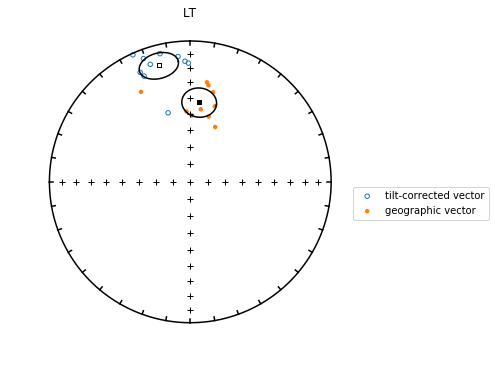

In [46]:
specimen_plot('TR036','LT')

n vectors = 2
n planes  = 2
tilt-corrected alpha95 = 53.89
geographic     alpha95 = 53.86


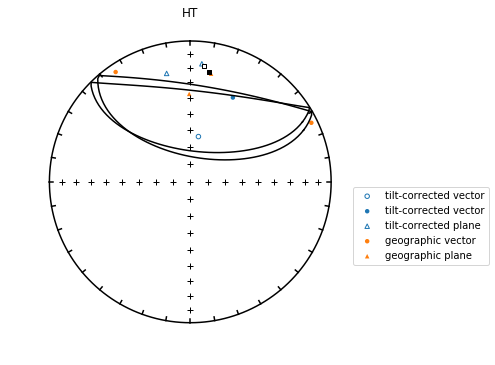

In [47]:
specimen_plot('TR036','HT',savestring='TR036_HT.pdf')

#### TR042

n vectors = 1
n planes  = 0


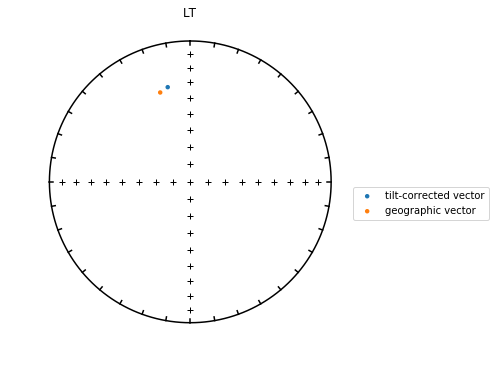

In [48]:
specimen_plot('TR042','LT')

n vectors = 14
n planes  = 0
tilt-corrected alpha95 = 11.69
geographic     alpha95 = 11.70


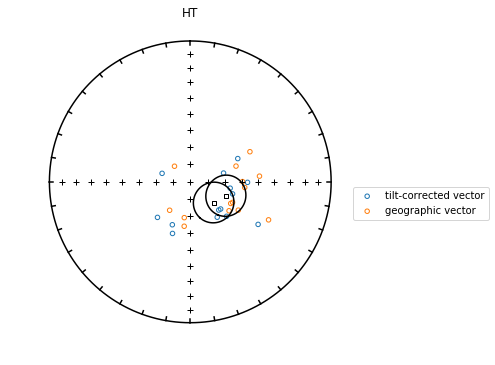

In [49]:
specimen_plot('TR042','HT',savestring='TR042_HT.pdf')

#### TR045

n vectors = 9
n planes  = 0
tilt-corrected alpha95 = 10.57
geographic     alpha95 = 10.59


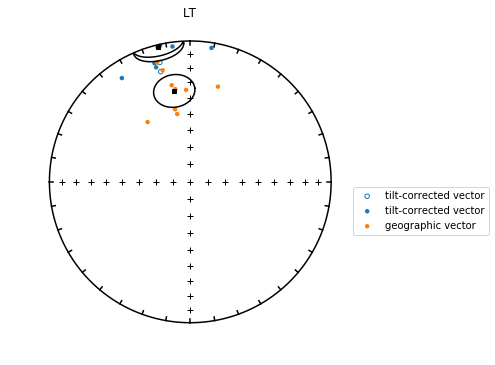

In [50]:
specimen_plot('TR045','LT')

n vectors = 9
n planes  = 4
tilt-corrected alpha95 = 30.67
geographic     alpha95 = 30.67


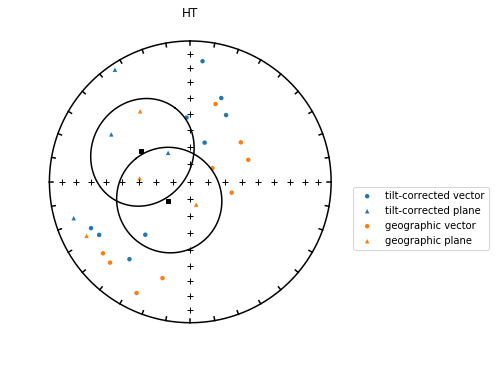

In [51]:
specimen_plot('TR045','HT',savestring='TR045_HT.pdf')

#### TR016

n vectors = 6
n planes  = 0
tilt-corrected alpha95 = 9.63
geographic     alpha95 = 9.66


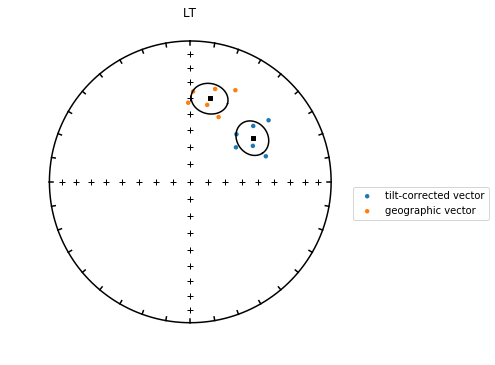

In [52]:
specimen_plot('TR016','LT')

n vectors = 7
n planes  = 0
tilt-corrected alpha95 = 23.39
geographic     alpha95 = 23.40


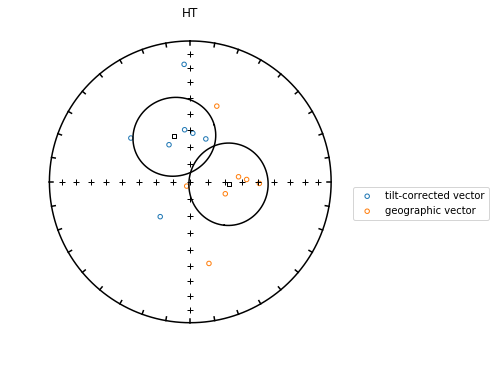

In [53]:
specimen_plot('TR016','HT',savestring='TR016_HT.pdf')

#### TR028

n vectors = 8
n planes  = 0
tilt-corrected alpha95 = 10.77
geographic     alpha95 = 10.77


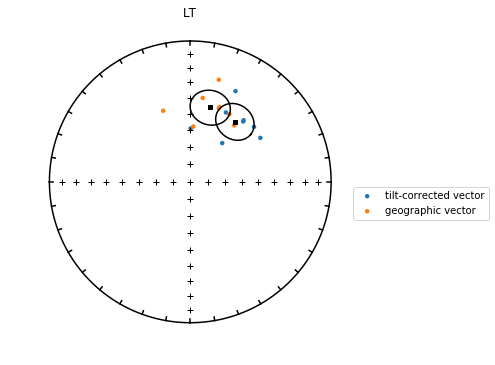

In [54]:
specimen_plot('TR028','LT')

n vectors = 4
n planes  = 1
tilt-corrected alpha95 = 12.98
geographic     alpha95 = 13.00


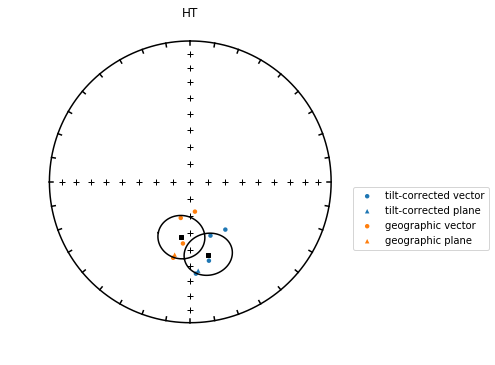

In [55]:
specimen_plot('TR028','HT',savestring='TR028_HT.pdf')

#### TR030

n vectors = 16
n planes  = 0
tilt-corrected alpha95 = 5.63
geographic     alpha95 = 5.63


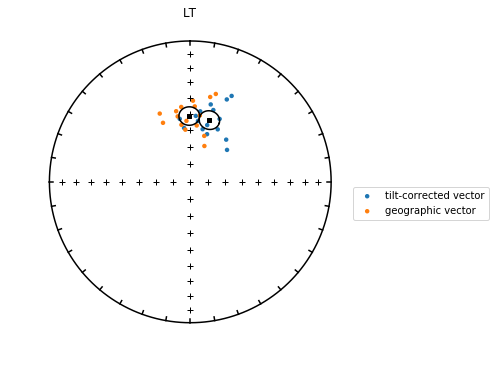

In [56]:
specimen_plot('TR030','LT')

n vectors = 4
n planes  = 0
tilt-corrected alpha95 = 34.40
geographic     alpha95 = 34.38


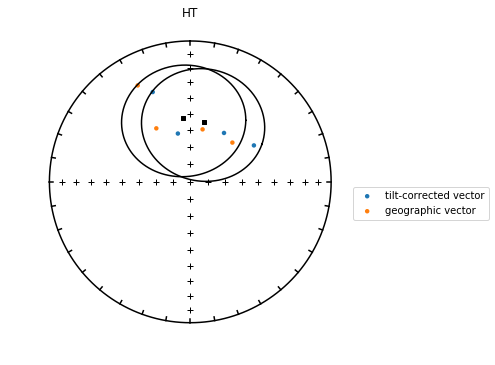

In [57]:
specimen_plot('TR030','HT',savestring='TR030_HT.pdf')

#### TR032

n vectors = 14
n planes  = 0
tilt-corrected alpha95 = 6.30
geographic     alpha95 = 6.31


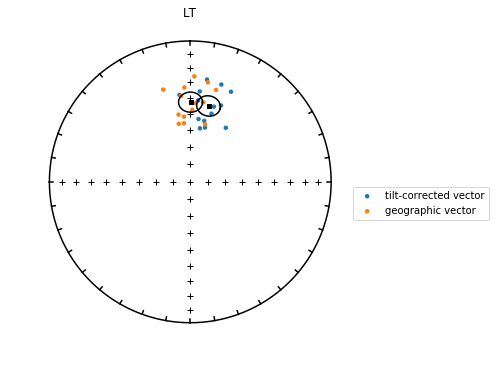

In [58]:
specimen_plot('TR032','LT')

n vectors = 3
n planes  = 3
tilt-corrected alpha95 = 18.35
geographic     alpha95 = 18.34


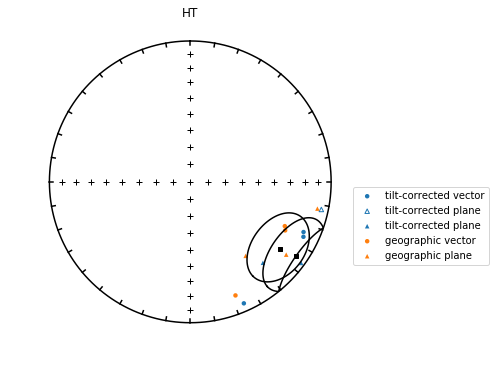

In [59]:
specimen_plot('TR032','HT',savestring='TR032_HT.pdf')

#### TR038

n vectors = 25
n planes  = 0
tilt-corrected alpha95 = 3.16
geographic     alpha95 = 3.12


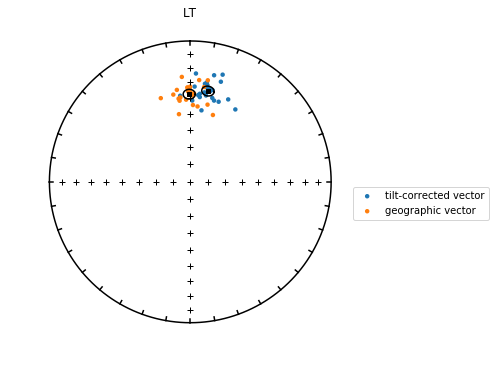

In [60]:
specimen_plot('TR038','LT')

n vectors = 15
n planes  = 4
tilt-corrected alpha95 = 23.80
geographic     alpha95 = 23.66


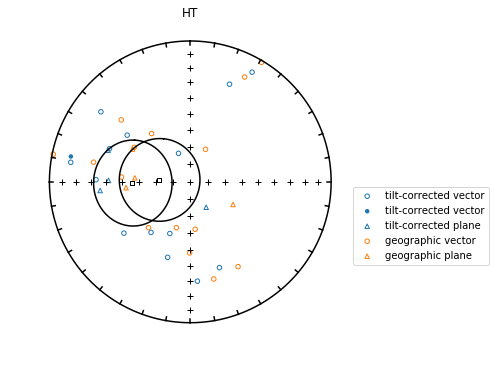

In [61]:
specimen_plot('TR038','HT',savestring='TR038_HT.pdf')

#### TR040

n vectors = 13
n planes  = 0
tilt-corrected alpha95 = 18.15
geographic     alpha95 = 18.15


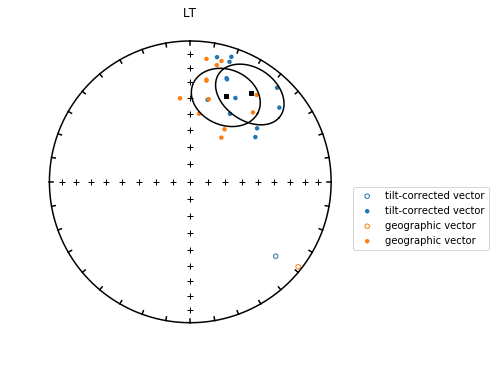

In [62]:
specimen_plot('TR040','LT')

n vectors = 14
n planes  = 0
tilt-corrected alpha95 = 36.36
geographic     alpha95 = 36.36


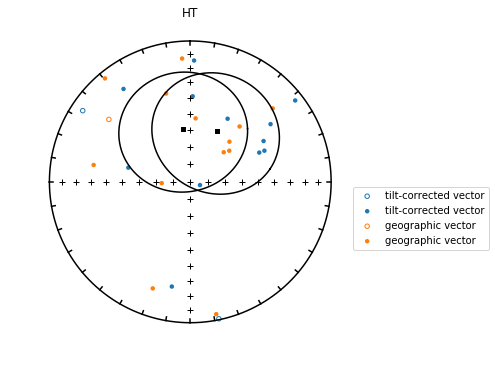

In [63]:
specimen_plot('TR040','HT',savestring='TR040_HT.pdf')

### Beijing

In [64]:
sitesBJ['site'].unique()

array(['16tr001', '16tr003', '16tr007', '16tr015', '16tr031', '16tr034'],
      dtype=object)

#### TR003

old bed dip direction = [55.0, 55.0, 55.0, 55.0, 55.0]
old bed dip           = [51.0, 51.0, 51.0, 51.0, 51.0]

new bed dip direction = 52.80
new bed dip           = 52.20

n vectors = 5
n planes  = 0
tilt-corrected alpha95 = 10.29
geographic     alpha95 = 10.29


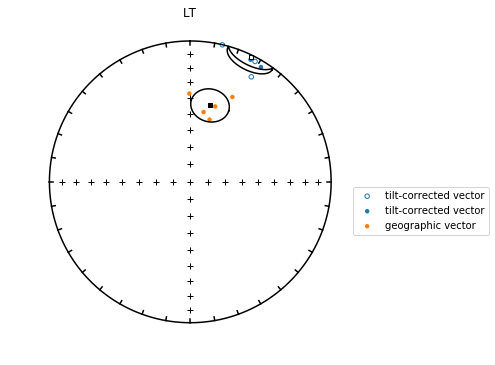

In [65]:
BJ_specimen_plot('16tr003', 'LT', 322.8, 52.2)

old bed dip direction = [55.0, 55.0, 55.0, 55.0, 55.0]
old bed dip           = [51.0, 51.0, 51.0, 51.0, 51.0]

new bed dip direction = 52.80
new bed dip           = 52.20

n vectors = 2
n planes  = 1
tilt-corrected alpha95 = 38.98
geographic     alpha95 = 38.98


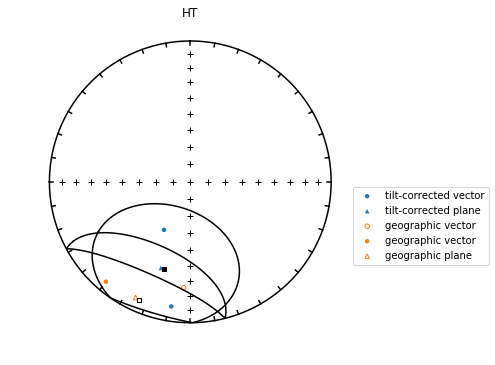

In [66]:
BJ_specimen_plot('16tr003', 'HT', 322.8, 52.2, savestring='TR003_HT.pdf')

#### TR007

old bed dip direction = [209.0, 209.0, 209.0, 209.0, 209.0, 209.0, 209.0, 209.0, 209.0, 209.0, 209.0]
old bed dip           = [45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0]

new bed dip direction = 32.60
new bed dip           = 44.30

n vectors = 3
n planes  = 0
tilt-corrected alpha95 = 13.99
geographic     alpha95 = 13.99


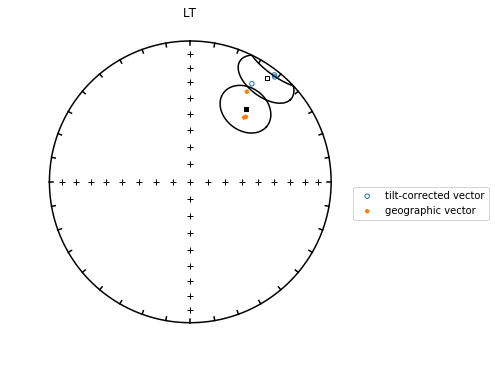

In [67]:
BJ_specimen_plot('16tr007', 'LT', 302.6, 44.3)

old bed dip direction = [209.0, 209.0, 209.0, 209.0, 209.0, 209.0, 209.0, 209.0, 209.0, 209.0, 209.0]
old bed dip           = [45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0]

new bed dip direction = 32.60
new bed dip           = 44.30

n vectors = 6
n planes  = 1
tilt-corrected alpha95 = 11.87
geographic     alpha95 = 11.87


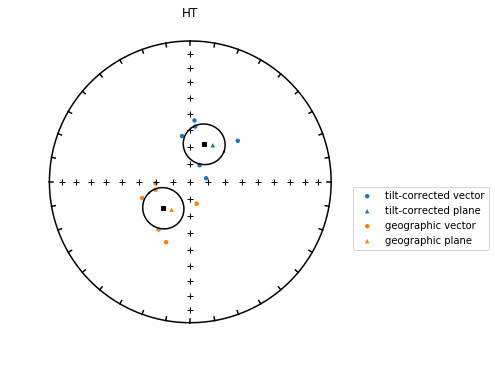

In [68]:
BJ_specimen_plot('16tr007', 'HT', 302.6, 44.3, savestring='TR007_HT.pdf')

#### TR015

old bed dip direction = [341.0, 341.0, 341.0, 341.0, 341.0]
old bed dip           = [29.0, 29.0, 29.0, 29.0, 29.0]

new bed dip direction = 343.80
new bed dip           = 29.30

n vectors = 5
n planes  = 0
tilt-corrected alpha95 = 21.27
geographic     alpha95 = 21.27


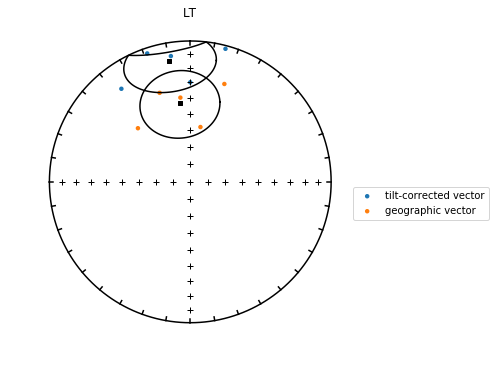

In [69]:
BJ_specimen_plot('16tr015', 'LT', 253.8, 29.3)

old bed dip direction = [341.0, 341.0, 341.0, 341.0, 341.0]
old bed dip           = [29.0, 29.0, 29.0, 29.0, 29.0]

new bed dip direction = 343.80
new bed dip           = 29.30

n vectors = 3
n planes  = 0
tilt-corrected alpha95 = 20.47
geographic     alpha95 = 20.47


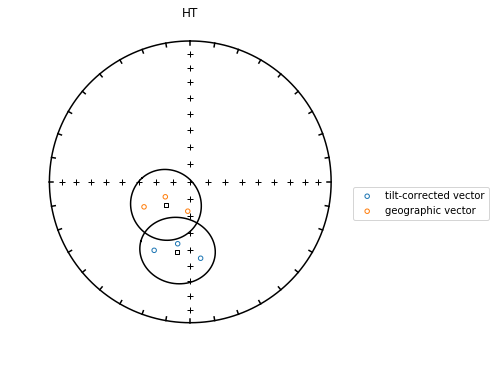

In [70]:
BJ_specimen_plot('16tr015', 'HT', 253.8, 29.3, savestring='TR015_HT.pdf')

#### TR031

old bed dip direction = [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 1.0, 7.0, 7.0, 7.0]
old bed dip           = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 7.0, 1.0, 1.0, 1.0]

new bed dip direction = 101.00
new bed dip           = 14.10

n vectors = 7
n planes  = 0
tilt-corrected alpha95 = 15.65
geographic     alpha95 = 15.65


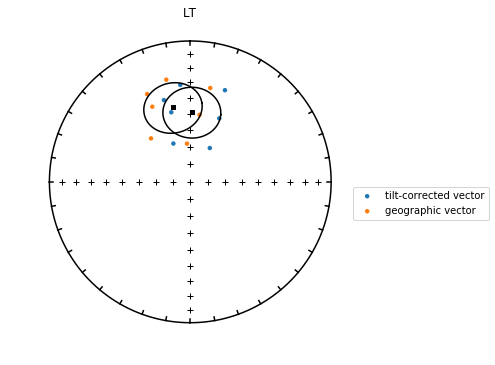

In [71]:
BJ_specimen_plot('16tr031', 'LT', 11.0, 14.1)

old bed dip direction = [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 1.0, 7.0, 7.0, 7.0]
old bed dip           = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 7.0, 1.0, 1.0, 1.0]

new bed dip direction = 101.00
new bed dip           = 14.10

n vectors = 3
n planes  = 1
tilt-corrected alpha95 = 19.32
geographic     alpha95 = 19.32


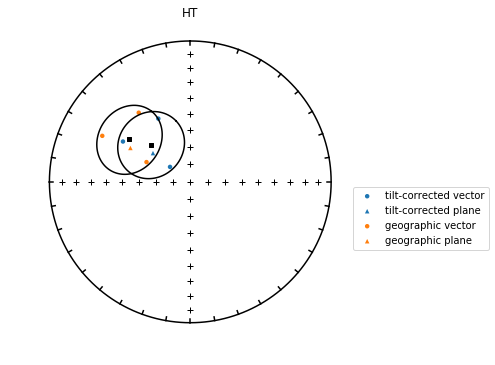

In [72]:
BJ_specimen_plot('16tr031', 'HT', 11.0, 14.1, savestring='TR031_HT.pdf')

#### TR034

old bed dip direction = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
old bed dip           = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

new bed dip direction = 183.10
new bed dip           = 13.50

n vectors = 4
n planes  = 0
tilt-corrected alpha95 = 30.17
geographic     alpha95 = 30.17


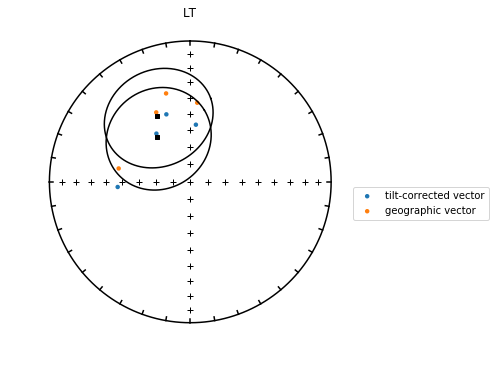

In [73]:
BJ_specimen_plot('16tr034', 'LT', 93.1, 13.5)

old bed dip direction = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
old bed dip           = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

new bed dip direction = 183.10
new bed dip           = 13.50

n vectors = 4
n planes  = 0
tilt-corrected alpha95 = 17.85
geographic     alpha95 = 17.85


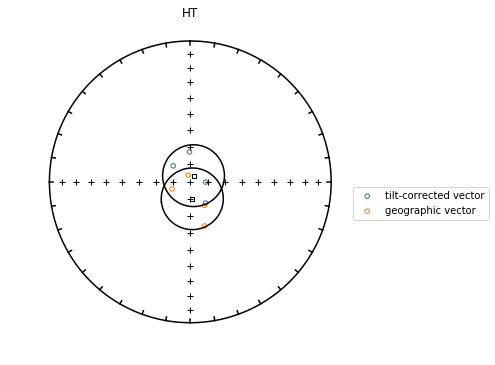

In [74]:
BJ_specimen_plot('16tr034', 'HT', 93.1, 13.5, savestring='TR034_HT.pdf')

## Site Means

In [75]:
LT = sites[sites['dir_comp_name']=='LT'].copy()
HT = sites[sites['dir_comp_name']=='HT'].copy()

LT_tc = LT[LT['dir_tilt_correction']==100]
LT_is = LT[LT['dir_tilt_correction']==0]

HT_tc = HT[HT['dir_tilt_correction']==100]
HT_is = HT[HT['dir_tilt_correction']==0]

LT_tc_dec = LT_tc['dir_dec'].tolist()
LT_tc_inc = LT_tc['dir_inc'].tolist()
LT_tc_a95 = LT_tc['dir_alpha95'].tolist()

LT_is_dec = LT_is['dir_dec'].tolist()
LT_is_inc = LT_is['dir_inc'].tolist()
LT_is_a95 = LT_is['dir_alpha95'].tolist()

HT_tc_dec = HT_tc['dir_dec'].tolist()
HT_tc_inc = HT_tc['dir_inc'].tolist()
HT_tc_a95 = HT_tc['dir_alpha95'].tolist()

HT_is_dec = HT_is['dir_dec'].tolist()
HT_is_inc = HT_is['dir_inc'].tolist()
HT_is_a95 = HT_is['dir_alpha95'].tolist()

Filter based on $\alpha_{95}$:

In [76]:
threshold = 20

good_site_list = HT_tc[HT_tc['dir_alpha95']<threshold]['site'].unique()

print('n = {}'.format(len(good_site_list)))
print(good_site_list)

n = 9
['TR002' 'TR014' 'TR018' 'TR020' 'TR024' 'TR026' 'TR035' 'TR042' 'TR028']


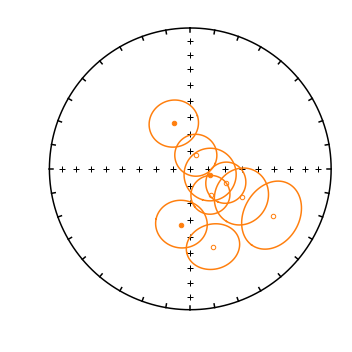

In [77]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(HT_is_dec)):
    if HT_tc_a95[i]<threshold:
        ipmag.plot_di_mean(HT_is_dec[i], HT_is_inc[i], HT_is_a95[i],color='C1')
plt.show()

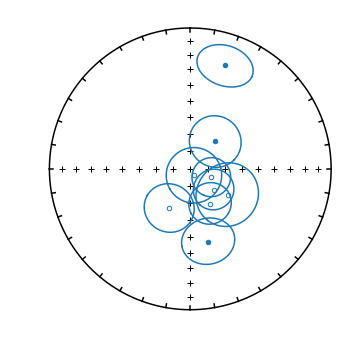

In [78]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(HT_tc_dec)):
    if HT_tc_a95[i]<threshold:
        ipmag.plot_di_mean(HT_tc_dec[i], HT_tc_inc[i], HT_tc_a95[i],color='C0')
plt.show()

Build up a summary list:

TR002 and TR028 are outliers - remove them for now.

In [79]:
good_site_list = ['TR014',
                  'TR018',
                  'TR020',
                  'TR024',
                  'TR026',
                  'TR035',
                  'TR042']

good_HT_tc_dec = np.array([])
good_HT_tc_inc = np.array([])
good_HT_tc_a95 = np.array([])
good_HT_is_dec = np.array([])
good_HT_is_inc = np.array([])
good_HT_is_a95 = np.array([])

for i in range(len(good_site_list)):
    this_HT_tc = HT_tc[HT_tc['site']==good_site_list[i]]
    this_HT_is = HT_is[HT_is['site']==good_site_list[i]]
    
    good_HT_tc_dec = np.append(good_HT_tc_dec, this_HT_tc['dir_dec'].tolist())
    good_HT_tc_inc = np.append(good_HT_tc_inc, this_HT_tc['dir_inc'].tolist())
    good_HT_tc_a95 = np.append(good_HT_tc_a95, this_HT_tc['dir_alpha95'].tolist())
    
    good_HT_is_dec = np.append(good_HT_is_dec, this_HT_is['dir_dec'].tolist())
    good_HT_is_inc = np.append(good_HT_is_inc, this_HT_is['dir_inc'].tolist())
    good_HT_is_a95 = np.append(good_HT_is_a95, this_HT_is['dir_alpha95'].tolist())

Add TR004 manually, since it was a dual polarity site:

In [80]:
good_HT_tc_dec = np.append(good_HT_tc_dec, TR004a_tc_HT_mean['dec'])
good_HT_tc_inc = np.append(good_HT_tc_inc, TR004a_tc_HT_mean['inc'])
good_HT_tc_a95 = np.append(good_HT_tc_a95, TR004a_tc_HT_mean['alpha95'])

good_HT_is_dec = np.append(good_HT_is_dec, TR004a_is_HT_mean['dec'])
good_HT_is_inc = np.append(good_HT_is_inc, TR004a_is_HT_mean['inc'])
good_HT_is_a95 = np.append(good_HT_is_a95, TR004a_is_HT_mean['alpha95'])

good_HT_tc_dec = np.append(good_HT_tc_dec, TR004b_tc_HT_mean['dec'])
good_HT_tc_inc = np.append(good_HT_tc_inc, TR004b_tc_HT_mean['inc'])
good_HT_tc_a95 = np.append(good_HT_tc_a95, TR004b_tc_HT_mean['alpha95'])

good_HT_is_dec = np.append(good_HT_is_dec, TR004b_is_HT_mean['dec'])
good_HT_is_inc = np.append(good_HT_is_inc, TR004b_is_HT_mean['inc'])
good_HT_is_a95 = np.append(good_HT_is_a95, TR004b_is_HT_mean['alpha95'])

Add Beijing data manually, since we need to fix the bedding measurements:

In [81]:
is_mean, tc_mean = get_BJ_site_mean('16tr007', 'HT', 302.6, 44.3)
good_HT_tc_dec = np.append(good_HT_tc_dec, tc_mean['dec'])
good_HT_tc_inc = np.append(good_HT_tc_inc, tc_mean['inc'])
good_HT_tc_a95 = np.append(good_HT_tc_a95, tc_mean['alpha95'])
good_HT_is_dec = np.append(good_HT_is_dec, is_mean['dec'])
good_HT_is_inc = np.append(good_HT_is_inc, is_mean['inc'])
good_HT_is_a95 = np.append(good_HT_is_a95, is_mean['alpha95'])

In [82]:
is_mean, tc_mean = get_BJ_site_mean('16tr031', 'HT', 11.0, 14.1)
good_HT_tc_dec = np.append(good_HT_tc_dec, tc_mean['dec'])
good_HT_tc_inc = np.append(good_HT_tc_inc, tc_mean['inc'])
good_HT_tc_a95 = np.append(good_HT_tc_a95, tc_mean['alpha95'])
good_HT_is_dec = np.append(good_HT_is_dec, is_mean['dec'])
good_HT_is_inc = np.append(good_HT_is_inc, is_mean['inc'])
good_HT_is_a95 = np.append(good_HT_is_a95, is_mean['alpha95'])

In [83]:
is_mean, tc_mean = get_BJ_site_mean('16tr034', 'HT', 93.1, 13.5)
good_HT_tc_dec = np.append(good_HT_tc_dec, tc_mean['dec'])
good_HT_tc_inc = np.append(good_HT_tc_inc, tc_mean['inc'])
good_HT_tc_a95 = np.append(good_HT_tc_a95, tc_mean['alpha95'])
good_HT_is_dec = np.append(good_HT_is_dec, is_mean['dec'])
good_HT_is_inc = np.append(good_HT_is_inc, is_mean['inc'])
good_HT_is_a95 = np.append(good_HT_is_a95, is_mean['alpha95'])

Plot:

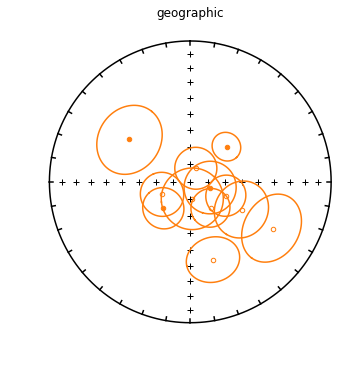

In [84]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(good_HT_is_dec)):
    ipmag.plot_di_mean(good_HT_is_dec[i], good_HT_is_inc[i], good_HT_is_a95[i], color='C1')
plt.title('geographic')
plt.show()

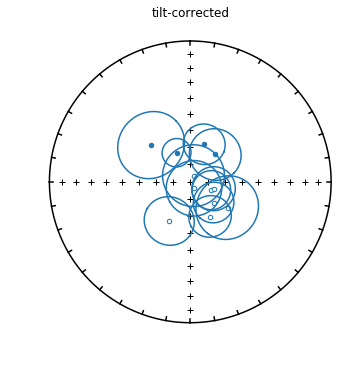

In [85]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(good_HT_tc_dec)):
    ipmag.plot_di_mean(good_HT_tc_dec[i], good_HT_tc_inc[i], good_HT_tc_a95[i], color='C0')
plt.title('tilt-corrected')
plt.show()

In [86]:
good_HT_is_inc_flipped = []
good_HT_is_dec_flipped = []
good_HT_is_a95_flipped = []
good_HT_tc_inc_flipped = []
good_HT_tc_dec_flipped = []
good_HT_tc_a95_flipped = []

for i in range(len(good_HT_tc_dec)):
    if good_HT_tc_inc[i] > 0:
        good_HT_is_inc_flipped.append(-good_HT_is_inc[i])
        good_HT_is_dec_flipped.append(good_HT_is_dec[i]+180)
        good_HT_tc_inc_flipped.append(-good_HT_tc_inc[i])
        good_HT_tc_dec_flipped.append(good_HT_tc_dec[i]+180)
    else:
        good_HT_is_inc_flipped.append(good_HT_is_inc[i])
        good_HT_is_dec_flipped.append(good_HT_is_dec[i])
        good_HT_tc_inc_flipped.append(good_HT_tc_inc[i])
        good_HT_tc_dec_flipped.append(good_HT_tc_dec[i])
    good_HT_is_a95_flipped.append(good_HT_is_a95[i])
    good_HT_tc_a95_flipped.append(good_HT_tc_a95[i])

good_HT_tc_mean = ipmag.fisher_mean(good_HT_tc_dec_flipped,good_HT_tc_inc_flipped)
good_HT_is_mean = ipmag.fisher_mean(good_HT_is_dec_flipped,good_HT_is_inc_flipped)

print('TILT-CORRECTED')
ipmag.print_direction_mean(good_HT_tc_mean)
print('')
print('GEOGRAPHIC')
ipmag.print_direction_mean(good_HT_is_mean)

TILT-CORRECTED
Dec: 154.9  Inc: -75.5
Number of directions in mean (n): 12
Angular radius of 95% confidence (a_95): 8.2
Precision parameter (k) estimate: 28.8

GEOGRAPHIC
Dec: 138.9  Inc: -73.0
Number of directions in mean (n): 12
Angular radius of 95% confidence (a_95): 15.2
Precision parameter (k) estimate: 9.1


In [87]:
print('predicted latitude = {:.2f}'.format(ipmag.lat_from_inc(good_HT_tc_mean['inc'])))

predicted latitude = -62.63


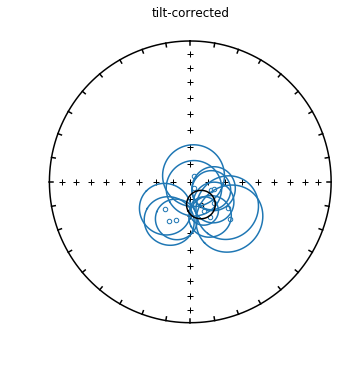

In [88]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(good_HT_tc_dec_flipped)):
    ipmag.plot_di_mean(good_HT_tc_dec_flipped[i], good_HT_tc_inc_flipped[i], good_HT_tc_a95_flipped[i], color='C0')
ipmag.plot_di_mean(good_HT_tc_mean['dec'], good_HT_tc_mean['inc'], good_HT_tc_mean['alpha95'], color='k')
plt.title('tilt-corrected')
plt.show()

In [89]:
pmag.dia_vgp(good_HT_tc_mean['dec']+180,-good_HT_tc_mean['inc'],good_HT_tc_mean['alpha95'],27.95,108.83)

(90.5160855251068, 51.62299249843777, 13.840601825719844, 15.08780830971719)

## Fold Test

### Specimens

In [90]:
fold_test_decs = np.array([])
fold_test_incs = np.array([])
fold_test_dip_dir = np.array([])
fold_test_dip = np.array([])

# Berkeley
specimens_HT = specimens[(specimens['dir_comp']=='HT')&\
                         (specimens['dir_tilt_correction']==0)&\
                         ((specimens['site']=='TR004')|\
                          (specimens['site']=='TR014')|\
                          (specimens['site']=='TR018')|\
                          (specimens['site']=='TR020')|\
                          (specimens['site']=='TR024')|\
                          (specimens['site']=='TR026')|\
                          (specimens['site']=='TR035')|\
                          (specimens['site']=='TR042'))].copy()
specimens_HT.reset_index(drop=True, inplace=True)
for i in range(len(specimens_HT.index)):
    for j in range(len(samples.index)):
        if specimens_HT['sample'][i] == samples['sample'][j]:
            fold_test_decs = np.append(fold_test_decs, specimens_HT['dir_dec'][i])
            fold_test_incs = np.append(fold_test_incs, specimens_HT['dir_inc'][i])
            fold_test_dip_dir = np.append(fold_test_dip_dir, samples['bed_dip_direction'][j])
            fold_test_dip = np.append(fold_test_dip, samples['bed_dip'][j])
            break
            
# Beijing
specimensBJ_HT = specimensBJ[(specimensBJ['dir_comp']=='HT')&\
                             (specimensBJ['dir_tilt_correction']==0)&\
                             ((specimensBJ['site']=='16tr007')|\
                              (specimensBJ['site']=='16tr031')|\
                              (specimensBJ['site']=='16tr034'))].copy()
specimensBJ_HT.reset_index(drop=True, inplace=True)
for i in range(len(specimensBJ_HT)):
    fold_test_decs = np.append(fold_test_decs, specimensBJ_HT['dir_dec'][i])
    fold_test_incs = np.append(fold_test_incs, specimensBJ_HT['dir_inc'][i])
    if specimensBJ_HT['site'][i] == '16tr007':
        fold_test_dip_dir = np.append(fold_test_dip_dir, (302.6+90)%360)
        fold_test_dip = np.append(fold_test_dip, 44.3)
    elif specimensBJ_HT['site'][i] == '16tr031':
        fold_test_dip_dir = np.append(fold_test_dip_dir, (11.0+90)%360)
        fold_test_dip = np.append(fold_test_dip, 14.1)
    elif specimensBJ_HT['site'][i] == '16tr034':
        fold_test_dip_dir = np.append(fold_test_dip_dir, (93.1+90)%360)
        fold_test_dip = np.append(fold_test_dip, 13.5)
        
for i in range(len(fold_test_dip_dir)):
    if fold_test_dip_dir[i]>360:
        fold_test_dip_dir[i]=fold_test_dip_dir[i]-360
        
fold_test_array = ipmag.make_diddd_array(fold_test_decs,fold_test_incs,fold_test_dip_dir,fold_test_dip)

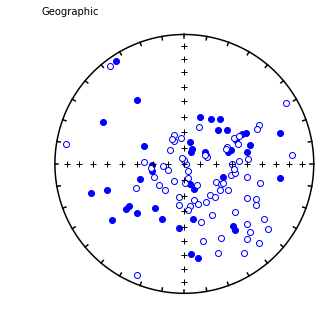

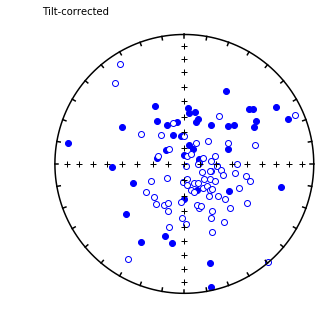

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
70 - 99 percent unfolding
range of all bootstrap samples: 
60  -  114 percent unfolding


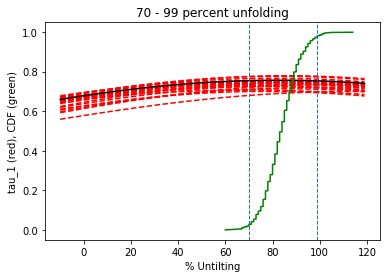

In [90]:
ipmag.bootstrap_fold_test(fold_test_array)

### Sites

TR035 uses different beddings through the site... not included in analysis for now. The rest of the sites have a single bedding for the whole site.

In [91]:
fold_test_decs = np.array([])
fold_test_incs = np.array([])
fold_test_dip_dir = np.array([])
fold_test_dip = np.array([])

# Berkeley
sites_HT = sites[(sites['dir_comp_name']=='HT')&\
                 (sites['dir_tilt_correction']==0)&\
                 ((sites['site']=='TR004')|\
                  (sites['site']=='TR014')|\
                  (sites['site']=='TR018')|\
                  (sites['site']=='TR020')|\
                  (sites['site']=='TR024')|\
                  (sites['site']=='TR026')|\
                  (sites['site']=='TR042'))].copy()
sites_HT.reset_index(drop=True, inplace=True)
for i in range(len(sites_HT.index)):
    for j in range(len(samples.index)):
        if sites_HT['site'][i] == samples['site'][j]:
            fold_test_decs = np.append(fold_test_decs, sites_HT['dir_dec'][i])
            fold_test_incs = np.append(fold_test_incs, sites_HT['dir_inc'][i])
            fold_test_dip_dir = np.append(fold_test_dip_dir, samples['bed_dip_direction'][j])
            fold_test_dip = np.append(fold_test_dip, samples['bed_dip'][j])
            break
            
# Beijing
sitesBJ_HT = sitesBJ[(sitesBJ['dir_comp_name']=='HT')&\
                     (sitesBJ['dir_tilt_correction']==0)&\
                     ((sitesBJ['site']=='16tr007')|\
                      (sitesBJ['site']=='16tr031')|\
                      (sitesBJ['site']=='16tr034'))].copy()
sitesBJ_HT.reset_index(drop=True, inplace=True)
for i in range(len(sitesBJ_HT)):
    fold_test_decs = np.append(fold_test_decs, sitesBJ_HT['dir_dec'][i])
    fold_test_incs = np.append(fold_test_incs, sitesBJ_HT['dir_inc'][i])
    if sitesBJ_HT['site'][i] == '16tr007':
        fold_test_dip_dir = np.append(fold_test_dip_dir, (302.6+90)%360)
        fold_test_dip = np.append(fold_test_dip, 44.3)
    elif sitesBJ_HT['site'][i] == '16tr031':
        fold_test_dip_dir = np.append(fold_test_dip_dir, (11.0+90)%360)
        fold_test_dip = np.append(fold_test_dip, 14.1)
    elif sitesBJ_HT['site'][i] == '16tr034':
        fold_test_dip_dir = np.append(fold_test_dip_dir, (93.1+90)%360)
        fold_test_dip = np.append(fold_test_dip, 13.5)
        
for i in range(len(fold_test_dip_dir)):
    if fold_test_dip_dir[i]>360:
        fold_test_dip_dir[i]=fold_test_dip_dir[i]-360
        
fold_test_array = ipmag.make_diddd_array(fold_test_decs,fold_test_incs,fold_test_dip_dir,fold_test_dip)

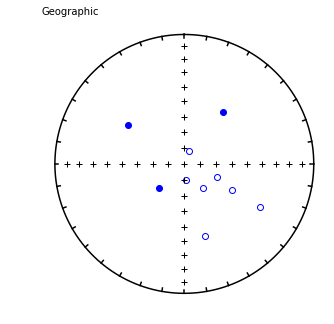

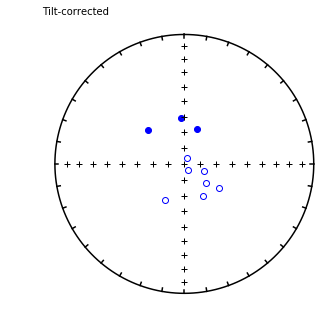

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
66 - 114 percent unfolding
range of all bootstrap samples: 
57  -  119 percent unfolding


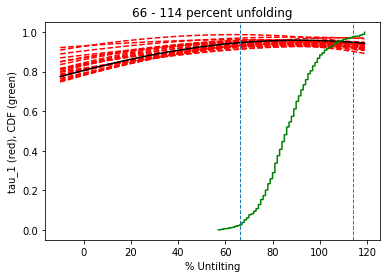

In [92]:
ipmag.bootstrap_fold_test(fold_test_array)

## Reversal test

Results of Watson V test: 

Watson's V:           2.6
Critical value of V:  7.9
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 11.3
Critical angle for M&M1990:   19.7
The McFadden and McElhinny (1990) classification for
this test is: 'C'


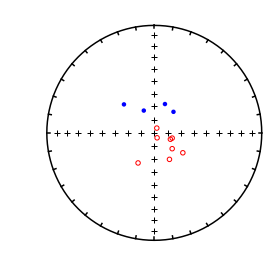

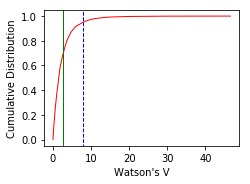

In [96]:
ipmag.reversal_test_MM1990(dec=good_HT_tc_dec,inc=good_HT_tc_inc,plot_CDF=True, plot_stereo=True)

## Elongation/Inclination analysis

In [91]:
tilt_corrected_directions = []
for n in range(0,len(fold_test_decs)):
    tilt_corrected_direction = pmag.dotilt(fold_test_decs[n],fold_test_incs[n],fold_test_dip_dir[n],fold_test_dip[n])
    tilt_corrected_directions.append(tilt_corrected_direction)
tilt_corrected_directions

[(114.82643727440527, -78.04340093625407),
 (84.27477792544472, -73.09874948488783),
 (327.3465787051124, -8.933167394685),
 (100.25098225534909, -57.59943492952726),
 (356.9569899405314, 84.7235175385938),
 (84.7103458094474, -80.89840147189308),
 (336.41159039956455, 63.07761978507502),
 (283.1559185650084, 72.54793169026888),
 (353.44532554909773, 72.47852256120653),
 (337.6923994576971, 70.62566345946423),
 (327.22309464258126, 57.89772215003315),
 (14.822484420661969, 78.0192016486923),
 (57.92653384273107, 17.90004688323918),
 (66.30768275515389, -6.942068975401271),
 (185.41034205882622, -78.57175587604549),
 (161.9968242286156, -60.53464689368164),
 (193.29177353166682, -48.2378470618118),
 (178.31886271417477, -51.50283216746951),
 (163.0869451784225, -62.97528273801375),
 (152.62410690682515, -76.34083808889),
 (104.76732577927734, -46.36061352320496),
 (113.1857770648098, -51.75907192342801),
 (101.47364125622076, -49.547587919631646),
 (104.60524428254965, -72.4345619348953

Bootstrapping.... be patient

PATHOLOGICAL DISTRIBUTION
The original inclination was: 76.43988268328079

The corrected inclination is: 0
with bootstrapped confidence bounds of: 74.65635443224245 to 87.41163042373653
and elongation parameter of: 0
The flattening factor is: 0


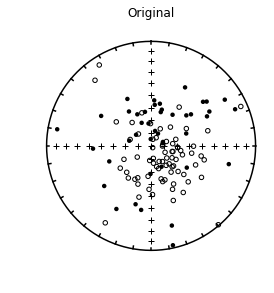

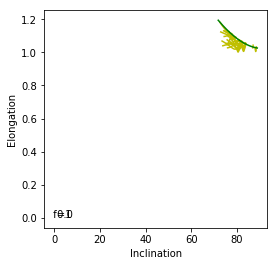

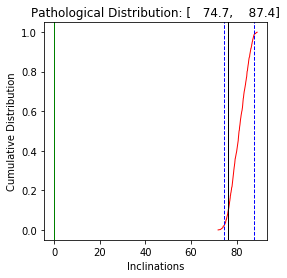

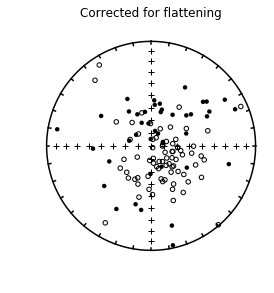

In [101]:
ipmag.find_ei(np.array(tilt_corrected_directions))

In [100]:
ipmag.unsquish(76,0.6)

81.49182893858324

### Luoman Local Fold Test

In [93]:
fold_test_decs = np.array([])
fold_test_incs = np.array([])
fold_test_dip_dir = np.array([])
fold_test_dip = np.array([])

Luoman2_specimen_HT = specimens[(specimens['dir_comp']=='HT')&\
                                (specimens['dir_tilt_correction']==0)&\
                                ((specimens['site']=='TR035')|\
                                 (specimens['site']=='TR036')|\
                                 (specimens['site']=='TR042'))].copy()
Luoman2_specimen_HT.reset_index(drop=True, inplace=True)
for i in range(len(Luoman2_specimen_HT.index)):
    for j in range(len(samples.index)):
        if Luoman2_specimen_HT['sample'][i] == samples['sample'][j]:
            fold_test_decs = np.append(fold_test_decs, Luoman2_specimen_HT['dir_dec'][i])
            fold_test_incs = np.append(fold_test_incs, Luoman2_specimen_HT['dir_inc'][i])
            fold_test_dip_dir = np.append(fold_test_dip_dir, samples['bed_dip_direction'][j])
            fold_test_dip = np.append(fold_test_dip, samples['bed_dip'][j])
            break
            
for i in range(len(fold_test_dip_dir)):
    if fold_test_dip_dir[i]>360:
        fold_test_dip_dir[i]=fold_test_dip_dir[i]-360
        
fold_test_array = ipmag.make_diddd_array(fold_test_decs,fold_test_incs,fold_test_dip_dir,fold_test_dip)

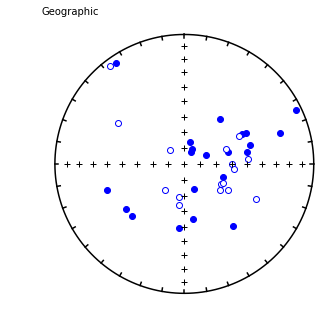

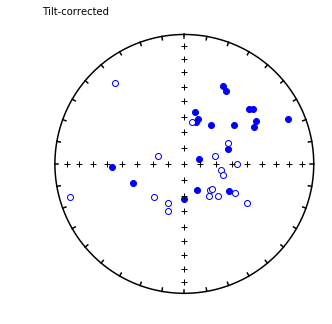

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
52 - 119 percent unfolding
range of all bootstrap samples: 
-10  -  119 percent unfolding


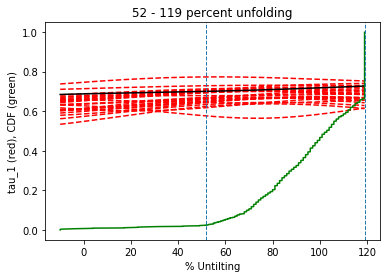

In [94]:
ipmag.bootstrap_fold_test(fold_test_array)